In [78]:
# pulsem  2024-25  
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import spectrogram, lfilter, freqz, tf2zpk, freqs, decimate, convolve2d 

################ utery #################
# --- 1 ---- 
z_1 = 1 + 1j  
z_21 = 1 - 1j
z_22 = 1 - 2j
z_23 = -1 + 1j
z_24 = -2 + 1j
print (z_1+ z_21, z_1+ z_22, z_1+ z_23, z_1+ z_24)

(2+0j) (2-1j) 2j (-1+2j)


In [79]:
# ---- 2 ---- 
z_1 = 3 * np.exp(1j * np.pi / 4)  
z_21 = 4 * np.exp(-1j * np.pi / 4)  
z_22 = 4 * np.exp(-1j * np.pi / 2)  
z_23 = 4 * np.exp(1j * np.pi / 4)  
z_24 = 4 * np.exp(1j * np.pi / 2)  
prods = [z_1 * z_21, z_1 * z_22, z_1 * z_23, z_1 * z_24]
print(prods)
print(np.abs(prods))
print(np.angle(prods))
print(np.angle(prods) / np.pi)

[(12+0j), (8.48528137423857-8.485281374238571j), (1.7763568394002505e-15+12j), (-8.48528137423857+8.485281374238571j)]
[12. 12. 12. 12.]
[ 0.         -0.78539816  1.57079633  2.35619449]
[ 0.   -0.25  0.5   0.75]


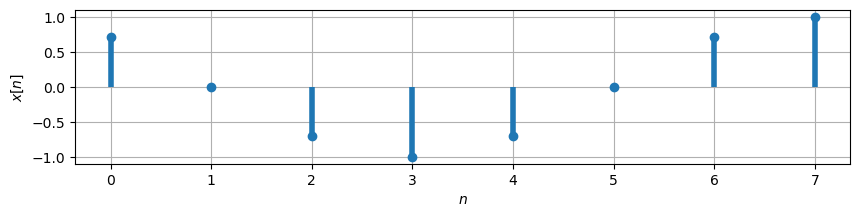

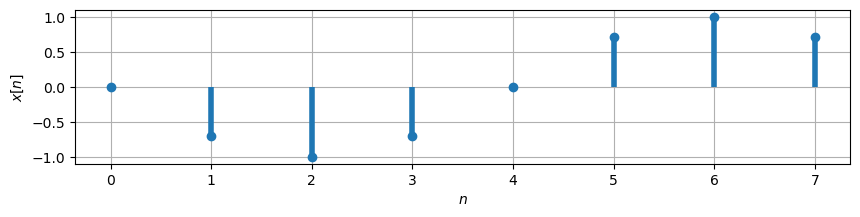

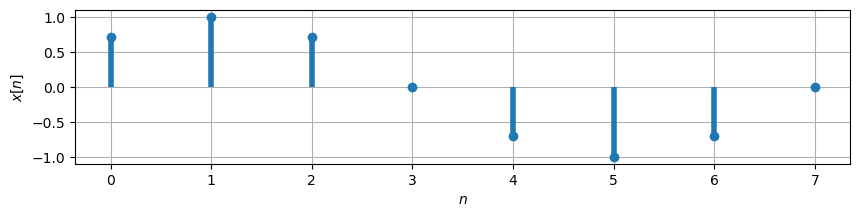

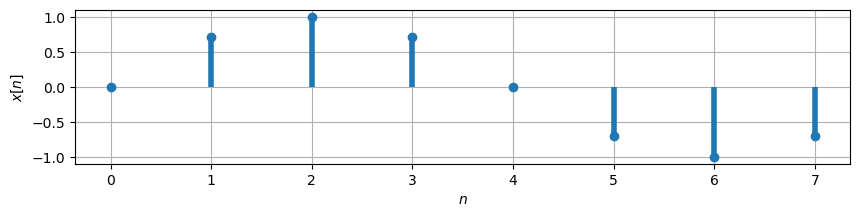

In [80]:
# ----- 4 ------
N = 8
n = np.arange(0,N)
c1 = np.cos(2 * np.pi / N * n + np.pi / 4)
c2 = np.cos(2 * np.pi / N * n + np.pi / 2)
c3 = np.cos(2 * np.pi / N * n - np.pi / 4)
c4 = np.cos(2 * np.pi / N * n - np.pi / 2)
fig=plt.figure(figsize=(10,2)); stem=plt.stem(n,c1,basefmt=" ")  # don't want the baseline  ...
stem[1].set_linewidth(4); fig.gca().grid(); fig.gca().set_xlabel('$n$'); fig.gca().set_ylabel('$x[n]$')
fig.savefig('fig/4_c1.eps',bbox_inches='tight')
fig=plt.figure(figsize=(10,2)); stem=plt.stem(n,c2,basefmt=" ")  # don't want the baseline  ...
stem[1].set_linewidth(4); fig.gca().grid(); fig.gca().set_xlabel('$n$'); fig.gca().set_ylabel('$x[n]$')
fig.savefig('fig/4_c2.eps',bbox_inches='tight')
fig=plt.figure(figsize=(10,2)); stem=plt.stem(n,c3,basefmt=" ")  # don't want the baseline  ...
stem[1].set_linewidth(4); fig.gca().grid(); fig.gca().set_xlabel('$n$'); fig.gca().set_ylabel('$x[n]$')
fig.savefig('fig/4_c3.eps',bbox_inches='tight')
fig=plt.figure(figsize=(10,2)); stem=plt.stem(n,c4,basefmt=" ")  # don't want the baseline  ...
stem[1].set_linewidth(4); fig.gca().grid(); fig.gca().set_xlabel('$n$'); fig.gca().set_ylabel('$x[n]$')
fig.savefig('fig/4_c4.eps',bbox_inches='tight')


In [81]:
# -------- 5 ---------- 
N = 8
n = np.arange(0,N)
x1 = 5 * np.exp(1j * np.pi / 4 ) * np.exp(1j* 2 * np.pi  / N * n) 
x2 = 5 * np.exp(-1j * np.pi / 4 ) * np.exp(1j* 2 * np.pi  / N * n) 
x3 = 5 * np.exp(1j * np.pi / 2 ) * np.exp(1j* 2 * np.pi  / N * n) 
x4 = 5 * np.exp(-1j * np.pi / 2 ) * np.exp(1j* 2 * np.pi  / N * n) 
print(x1, x2, x3, x4)

[ 3.53553391e+00+3.53553391e+00j  8.88178420e-16+5.00000000e+00j
 -3.53553391e+00+3.53553391e+00j -5.00000000e+00+8.88178420e-16j
 -3.53553391e+00-3.53553391e+00j -8.88178420e-16-5.00000000e+00j
  3.53553391e+00-3.53553391e+00j  5.00000000e+00-1.33226763e-15j] [ 3.53553391e+00-3.53553391e+00j  5.00000000e+00+0.00000000e+00j
  3.53553391e+00+3.53553391e+00j  0.00000000e+00+5.00000000e+00j
 -3.53553391e+00+3.53553391e+00j -5.00000000e+00+4.44089210e-16j
 -3.53553391e+00-3.53553391e+00j -8.88178420e-16-5.00000000e+00j] [ 3.06161700e-16+5.00000000e+00j -3.53553391e+00+3.53553391e+00j
 -5.00000000e+00+6.12323400e-16j -3.53553391e+00-3.53553391e+00j
 -9.18485099e-16-5.00000000e+00j  3.53553391e+00-3.53553391e+00j
  5.00000000e+00-1.22464680e-15j  3.53553391e+00+3.53553391e+00j] [ 3.06161700e-16-5.00000000e+00j  3.53553391e+00-3.53553391e+00j
  5.00000000e+00+0.00000000e+00j  3.53553391e+00+3.53553391e+00j
  3.06161700e-16+5.00000000e+00j -3.53553391e+00+3.53553391e+00j
 -5.00000000e+00+6.123

In [82]:
# ---------- 6 ---------
N = 256
n = np.arange(0,N)
x = 1 + 2*np.cos(np.pi * n)
print(x[0:10])
a = np.zeros(N); a[6:56] = 1; c = np.dot(x,a); print(c)
a = np.zeros(N); a[10:60] = 1; c = np.dot(x,a); print(c)
a = np.zeros(N); a[100:150] = 1; c = np.dot(x,a); print(c)
a = np.zeros(N); a[150:200] = 1; c = np.dot(x,a); print(c)


[ 3. -1.  3. -1.  3. -1.  3. -1.  3. -1.]
50.0
50.0
50.0
50.0


In [83]:
# -------- 7 DFT -----------
N = 8; x = np.zeros(N); 
x = np.zeros(N); x[1:5] = 1; print(x); X = np.fft.fft(x); print(X[1])
x = np.zeros(N); x[2:6] = 1; print(x); X = np.fft.fft(x); print(X[1])
x = np.zeros(N); x[3:7] = 1; print(x); X = np.fft.fft(x); print(X[1])
x = np.zeros(N); x[4:8] = 1; print(x); X = np.fft.fft(x); print(X[1])
print (2.41 / np.sqrt(2))

[0. 1. 1. 1. 1. 0. 0. 0.]
(-1-2.414213562373095j)
[0. 0. 1. 1. 1. 1. 0. 0.]
(-2.414213562373095-1j)
[0. 0. 0. 1. 1. 1. 1. 0.]
(-2.414213562373095+1j)
[0. 0. 0. 0. 1. 1. 1. 1.]
(-1+2.414213562373095j)
1.7041273426595795


In [84]:
################ ctvrtek #################
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import spectrogram, lfilter, freqz, tf2zpk, freqs, decimate, convolve2d 
from IPython.display import Audio
from matplotlib import cm

# ----- 1  -----
z_1 = 1 + 1j  
z_21 = 1 - 1j
z_22 = 1 - 2j
z_23 = -1 + 1j
z_24 = -2 + 1j
print (z_21 - z_1, z_22 - z_1, z_23 - z_1, z_24 - z_1)

-2j -3j (-2+0j) (-3+0j)


In [85]:
# ---- 2 ---- 
z_1 = 3 * np.exp(1j * 0.4)  
z_21 = 4 * np.exp(-1j * 0.7)  
z_22 = 4 * np.exp(-1j * 1.4)  
z_23 = 4 * np.exp(1j * 0.7)  
z_24 = 4 * np.exp(1j * 1.4)  
prods = [z_1 * z_21, z_1 * z_22, z_1 * z_23, z_1 * z_24]
print(prods)
print(np.abs(prods))
print(np.angle(prods))
print(np.angle(prods) / np.pi)

[(11.464037869507273-3.5462424799360748j), (6.483627670417677-10.097651817694757j), (5.44315345710693+10.694488320737225j), (-2.7264251363170433+11.686171570538342j)]
[12. 12. 12. 12.]
[-0.3 -1.   1.1  1.8]
[-0.09549297 -0.31830989  0.35014087  0.5729578 ]


In [86]:
# -------- 3 ---------- 
N = 8
n = 9
x1 = 5 * np.exp(1j * np.pi / 4 ) * np.exp(1j* 2 * np.pi  / N * n) 
x2 = 5 * np.exp(-1j * np.pi / 4 ) * np.exp(1j* 2 * np.pi  / N * n) 
x3 = 5 * np.exp(1j * np.pi / 2 ) * np.exp(1j* 2 * np.pi  / N * n) 
x4 = 5 * np.exp(-1j * np.pi / 2 ) * np.exp(1j* 2 * np.pi  / N * n) 
print(x1, x2, x3, x4)
print(5 / np.sqrt(2))

(1.3322676295501878e-15+5j) (5-8.881784197001252e-16j) (-3.535533905932737+3.5355339059327386j) (3.535533905932737-3.5355339059327386j)
3.5355339059327373


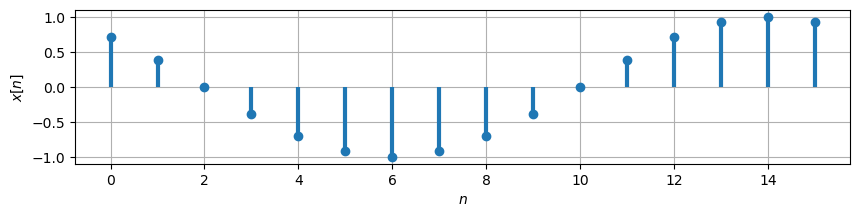

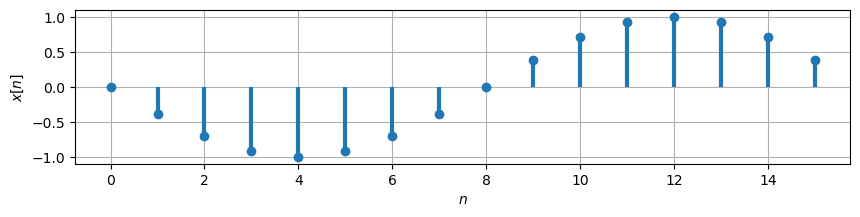

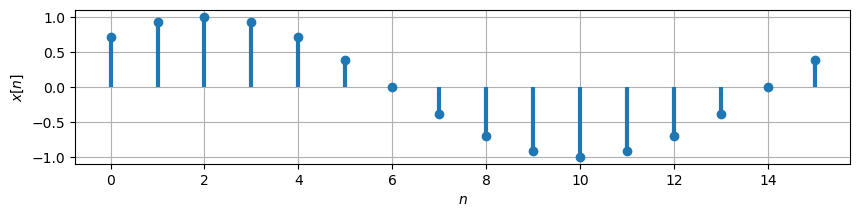

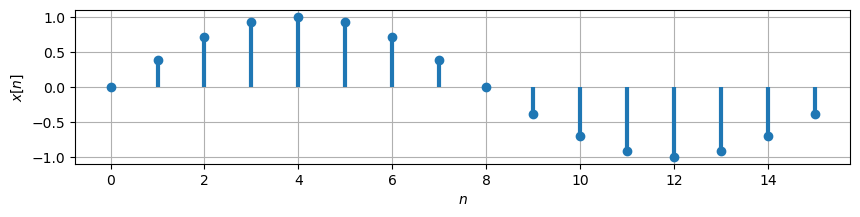

In [87]:
# ----- 4 ------
N = 16
n = np.arange(0,N)
c1 = np.cos(2 * np.pi / N * n + np.pi / 4)
c2 = np.cos(2 * np.pi / N * n + np.pi / 2)
c3 = np.cos(2 * np.pi / N * n - np.pi / 4)
c4 = np.cos(2 * np.pi / N * n - np.pi / 2)
fig=plt.figure(figsize=(10,2)); stem=plt.stem(n,c1,basefmt=" ")  # don't want the baseline  ...
stem[1].set_linewidth(3); fig.gca().grid(); fig.gca().set_xlabel('$n$'); fig.gca().set_ylabel('$x[n]$')
fig.savefig('fig/Thu4_c1.eps',bbox_inches='tight')
fig=plt.figure(figsize=(10,2)); stem=plt.stem(n,c2,basefmt=" ")  # don't want the baseline  ...
stem[1].set_linewidth(3); fig.gca().grid(); fig.gca().set_xlabel('$n$'); fig.gca().set_ylabel('$x[n]$')
fig.savefig('fig/Thu4_c2.eps',bbox_inches='tight')
fig=plt.figure(figsize=(10,2)); stem=plt.stem(n,c3,basefmt=" ")  # don't want the baseline  ...
stem[1].set_linewidth(3); fig.gca().grid(); fig.gca().set_xlabel('$n$'); fig.gca().set_ylabel('$x[n]$')
fig.savefig('fig/Thu4_c3.eps',bbox_inches='tight')
fig=plt.figure(figsize=(10,2)); stem=plt.stem(n,c4,basefmt=" ")  # don't want the baseline  ...
stem[1].set_linewidth(3); fig.gca().grid(); fig.gca().set_xlabel('$n$'); fig.gca().set_ylabel('$x[n]$')
fig.savefig('fig/Thu4_c4.eps',bbox_inches='tight')

In [88]:
# ---------- 6 ---------
N = 256
n = np.arange(0,N)
x = 2*np.cos(2*np.pi / 50 * n)
print(x[0:10])
a = np.zeros(N); a[6:56] = 1; c = np.dot(x,a); print(c)
a = np.zeros(N); a[10:60] = 1; c = np.dot(x,a); print(c)
a = np.zeros(N); a[100:150] = 1; c = np.dot(x,a); print(c)
a = np.zeros(N); a[150:200] = 1; c = np.dot(x,a); print(c)


[2.         1.9842294  1.93716632 1.85955297 1.75261336 1.61803399
 1.45793725 1.27484798 1.07165359 0.85155858]
2.6645352591003757e-15
3.3306690738754696e-16
-1.7763568394002505e-15
6.217248937900877e-15


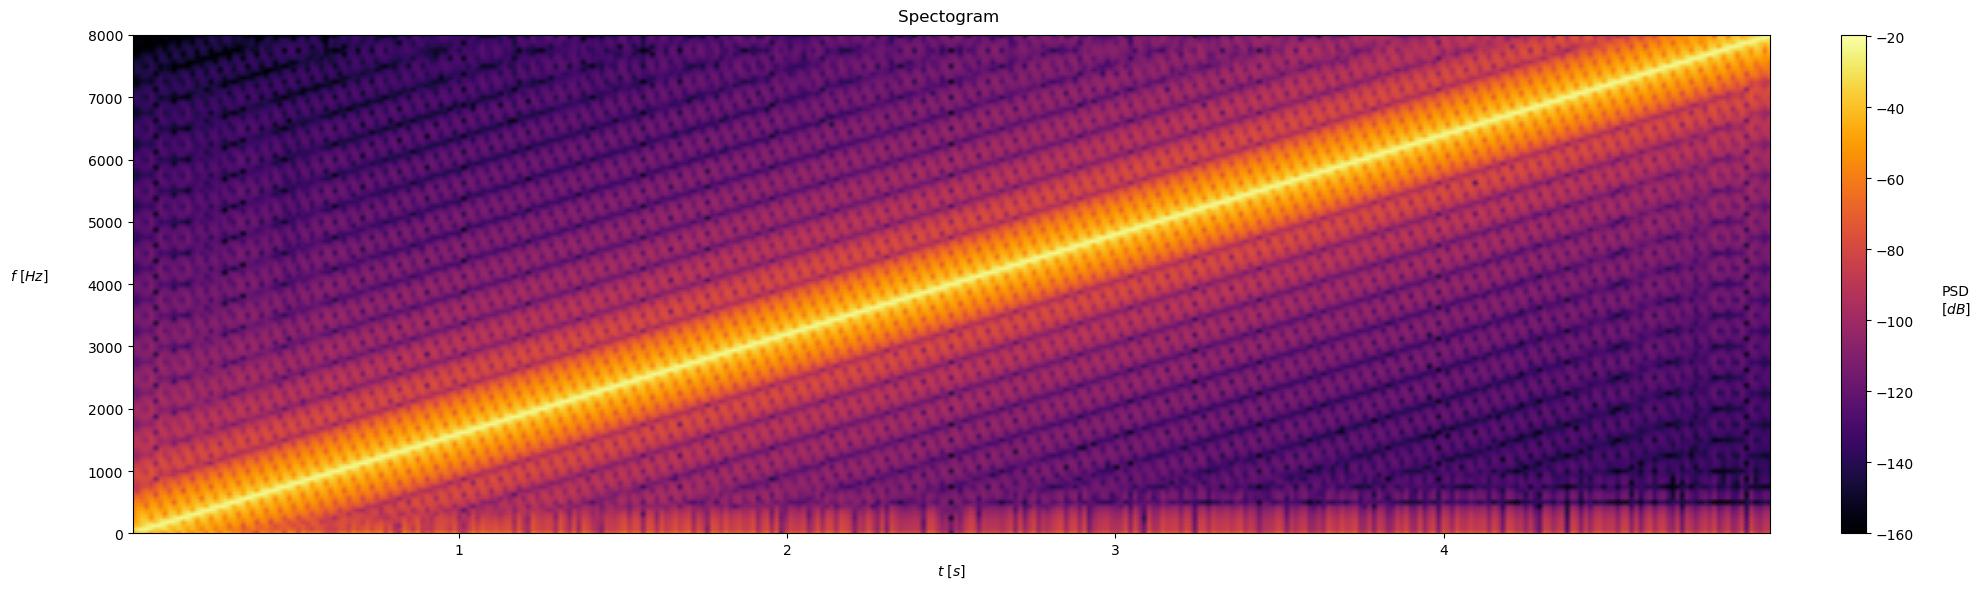

In [89]:
# ----- 10 specgram -----
Fs = 16000
N = 5 * Fs 
n = np.arange(0,N)
omegas = 2 * np.pi * np.linspace(0,Fs/2,N) / Fs
phase = np.cumsum(omegas)
x = np.cos(phase)           # Honza
#x1 = np.cos(omegas * n)     # KarelB - aliasing as a hell ! 
display(Audio(x, rate=Fs))
#display(Audio(x1, rate=Fs))

def plot_spectrogram(f, t, sgr, name='', vmin=-160, ax=None):
    # Transfer to PSD
    sgr_log = 10 * np.log10(sgr + 1e-20)  # log(0) is undefined -> +1e-20 (add small value)

    if ax == None:
        fig = plt.figure(figsize=(20, 6))
        ax = fig.add_subplot(111)

    name = f'[{name}]' if name else ''
    ax.set_title("Spectogram " + name, pad=10)
    ax.set_xlabel('$t\ [s]$')
    ax.set_ylabel('$f\ [Hz]$', rotation=0, labelpad=42)
    ax.set_xlim(min(t), max(t))

    # pcolormesh of spectogram:
    cmesh = ax.pcolormesh(t, f, sgr_log, shading="gouraud", cmap=cm.inferno, vmin=vmin)
    cbar = plt.colorbar(cmesh, ax=ax, fraction=0.046, pad=0.04)
    cbar.set_label('PSD\n$[dB]$', rotation=0, labelpad=30)
    plt.tight_layout()
    
freq, time, sgr = spectrogram(x, Fs)
plot_spectrogram(freq, time, sgr)
#freq, time, sgr = spectrogram(x1, Fs)
#plot_spectrogram(freq, time, sgr)